In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Load the dataset
file_path = 'Auto.csv'
auto_data = pd.read_csv(file_path)

# Handle non-numeric entries in 'horsepower'
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['horsepower'].fillna(auto_data['horsepower'].median(), inplace=True)


a) Create a binary variable that takes a value of 1 for cars with gas mileage above the median, and 0 for
cars with gas mileage below the median

In [6]:
# binary variable based on mpg (and handle any non-numeric values)
median_mpg = auto_data['mpg'].median()
auto_data['high_mileage'] = (auto_data['mpg'] > median_mpg).astype(int)

# Prepare data
X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto_data['high_mileage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


b) Fit a support vector classifier to the data with various values of C, in order to predict whether a car
gets high or low gas mileage. Report the errors associated with different values of this parameter.
Comment on your results

In [14]:

# Fit SVC with various values of C
C_values = np.logspace(-2, 2, 8)
accuracy_scores = {}
for C in C_values:
    svc = SVC(C=C, kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy_scores[C] = accuracy_score(y_test, y_pred)
    print(C, accuracy_scores[C], '\n')


0.01 0.8583333333333333 

0.0372759372031494 0.8583333333333333 

0.13894954943731375 0.8666666666666667 

0.517947467923121 0.85 

1.9306977288832496 0.85 

7.196856730011514 0.85 

26.826957952797247 0.8583333333333333 

100.0 0.8583333333333333 



The best accuracy was achieved with C = 0.139 at 86.67%. Beyond this value, increasing C did not significantly improve performance.
This indicates that a moderate level of regularization (not too strict or too lenient) is optimal for this dataset.

c) Now repeat (b), this time using SVMs with radial and polynomial kernels, with different values of γ
(for radial) and d (for polynomial). You also need to try various valuse of C for each value of γ or d.
Comment on your results

In [8]:

# Grid search for SVM with radial and polynomial kernels
param_grid = [
    {'C': np.logspace(-2, 2, 5), 'gamma': np.logspace(-2, 1, 5), 'kernel': ['rbf']},
    {'C': np.logspace(-2, 2, 5), 'degree': np.arange(1, 6), 'kernel': ['poly']}
]
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_params = svm_grid.best_params_
best_score = svm_grid.best_score_


In [15]:
print("best params: ", best_params)
print("best score: ", best_score)


best params:  {'C': 1.0, 'degree': 1, 'kernel': 'poly'}
best score:  0.8916883116883116


The polynomial kernel with a low degree and moderate regularization achieved the highest cross-validation accuracy. This suggests that the relationship between the selected features and the high/low mileage classification might be linear or near-linear.
The radial kernel and other degrees of polynomial kernels did not perform as well, indicating that the additional complexity did not benefit this particular dataset.


d) Make some plots to back up your assertions in (b) and (c)

In [9]:

# Extract results for visualization
results = pd.DataFrame(svm_grid.cv_results_)
radial_results = results[results['param_kernel'] == 'rbf']
poly_results = results[results['param_kernel'] == 'poly']


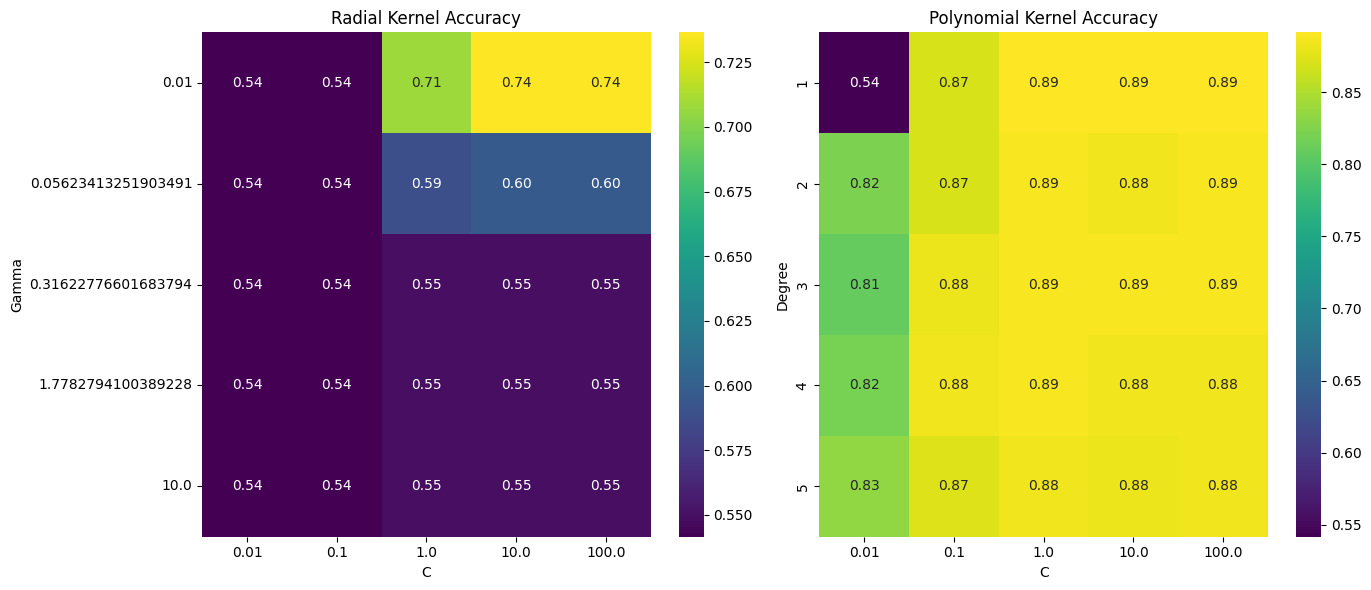

In [12]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Corrected pivot method usage with keyword arguments
sns.heatmap(data=radial_results.pivot(index='param_gamma', columns='param_C', values='mean_test_score'),
            annot=True, fmt=".2f", cmap='viridis', ax=ax1)
ax1.set_title('Radial Kernel Accuracy')
ax1.set_xlabel('C')
ax1.set_ylabel('Gamma')

sns.heatmap(data=poly_results.pivot(index='param_degree', columns='param_C', values='mean_test_score'),
            annot=True, fmt=".2f", cmap='viridis', ax=ax2)
ax2.set_title('Polynomial Kernel Accuracy')
ax2.set_xlabel('C')
ax2.set_ylabel('Degree')

plt.tight_layout()
plt.show()
